<center>
# Numpy exercise
</center>
**Due** : ~ 2018-03-06 23:59:59

In [ ]:
import numpy as np

> **Warning**

> * <font color='red'> Do not use other packages except for `numpy` </font>

> * <font color='red'> Do not modify other code except for `YOUR CODE HERE` </font>

## Problem 1

가로 1m, 세로 1m의 정사각형에 임의의 점 10개를 찍고, 찍힌 점을 순서대로 이어서 처음의 점으로 돌아오는 직선의 길이의 합을 구하시오. 동일한 시행을 총 100,000회 반복하고 평균값과 표준편차를 계산하시오. 100,000회의 시행으로 계산된 거리를 히스토그램 (bin의 개수는 100개)으로 도시하시오. (numpy.random 이용하기)

<center>
<img src="https://preview.ibb.co/dEQNhc/3.png" alt="Drawing" style="width: 400px;"/>
</center>


In [1]:
def length_on_square(n):
    t=[]
    for k in np.arange(1,n+1):
        x=[]
        length=[]
        for j in np.arange(1,11):
            p=np.array([np.random.uniform(0,1),np.random.uniform(0,1)])
            x.append(p)
        for i in np.arange(1,11):
            if i==0:
                next
            elif i==10:
                l=np.sqrt((x[9][0]-x[0][0])**2+(x[9][1]-x[0][1])**2)
            else:
                l=np.sqrt((x[i][0]-x[i-1][0])**2+(x[i][1]-x[i-1][1])**2) 
            length.append(l)
        lengthsum=np.cumsum(length)
        t.append(lengthsum[9])
    return t

In [5]:
%time
import numpy as np
length_array = length_on_square(100000)
print('AVG : ' + str(np.mean(length_array)))
print('STD : ' + str(np.std(length_array)))

Wall time: 0 ns
AVG : 5.211641801494878
STD : 0.867315900314959


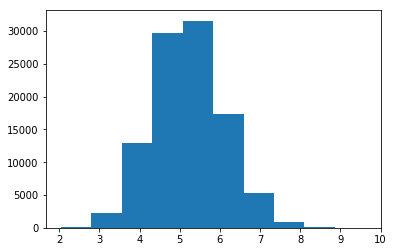

In [7]:
import matplotlib.pyplot as plt

plt.hist(length_array)
plt.show()

## Problem 2

주가 일간 수익률 데이터 (csv 파일)를 읽어서 (list로 만들고, ndarray로 변환) 수익률의 평균, 표준편차, 분산-공분산행렬, 상관계수행렬 계산
투자비중이 w인 포트폴리오의 기대수익률과 수익률의 표준편차를 numpy 행렬연산으로 계산


In [10]:
from pandas import read_csv

ndarray = read_csv('Lecture 3-1 numpy exercise.csv').values

In [11]:
def calc_mean(ndarray):
    mean=np.mean(ndarray, axis=0)  
    return mean

In [12]:
def calc_std(ndarray):
    std=np.std(ndarray, axis=0)
    return std

In [13]:
def calc_cov(ndarray):
    cov=np.cov(ndarray, rowvar=False)
    return cov

In [14]:
print('MEAN : '+ str(calc_mean(ndarray)))
print('STD  : '+ str(calc_std(ndarray)))

MEAN : [ 0.13845238  0.15666667  0.21464286 -0.13095238  0.26142857 -0.09297619
  0.19690476]
STD  : [1.35709204 1.51350849 1.4958247  1.40346054 2.07293221 1.45391326
 1.26407973]


In [18]:
print(calc_cov(ndarray))

[[ 1.86388794  0.78160803  0.59904944 -0.067928    0.69113477  0.15407486
   0.4818831 ]
 [ 0.78160803  2.31830683  1.77335904  0.43266908  0.13747952  0.47947309
   1.13360884]
 [ 0.59904944  1.77335904  2.26444927  0.4938599   0.03530052  0.07685374
   1.12742298]
 [-0.067928    0.43266908  0.4938599   1.99343282 -0.80458898 -0.40958239
   0.30279943]
 [ 0.69113477  0.13747952  0.03530052 -0.80458898  4.34881962  0.84210912
   0.43615026]
 [ 0.15407486  0.47947309  0.07685374 -0.40958239  0.84210912  2.139332
   0.11749911]
 [ 0.4818831   1.13360884  1.12742298  0.30279943  0.43615026  0.11749911
   1.61714934]]


In [21]:
w = np.array([0.3, 0.2, 0.1, 0.1, 0.1, 0.2, 0])

In [24]:
def port_mean(ndarray, w):
    mean=w.dot(calc_mean(ndarray))
    return mean

def port_std(ndarray, w):
    std=np.sqrt(w.dot(calc_cov(ndarray)).dot(w))
    return std

In [25]:
print('MEAN : ' + str(port_mean(ndarray, w)))
print('STD  : ' + str(port_std(ndarray, w)))

MEAN : 0.08878571428571427
STD  : 0.8744739013434357
